In [9]:
# Description: In conjunction of analyzing DBO

In [11]:
# Import libraries needed
import math
import yfinance as yf
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
# Pull stock data
df = yf.download('DBO', start='2019-01-01',end='2020-07-22')
# Show the data
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DBO,DBO,DBO,DBO,DBO
Date,,,,,
2019-01-02,7.696126,7.865566,7.312658,7.357247,868200
2019-01-03,7.758551,7.803141,7.535604,7.794223,717700
2019-01-04,7.945827,8.106349,7.847730,7.945827,722100
2019-01-07,8.026089,8.195528,7.981499,8.017171,377000
2019-01-08,8.195527,8.222281,8.079595,8.142020,311200
...,...,...,...,...,...
2020-07-15,6.617460,6.662785,6.535875,6.590265,2144400
2020-07-16,6.590264,6.653720,6.581200,6.599330,766200


In [15]:
# Get the number of rows and columns in the data set
df.shape

(391, 5)

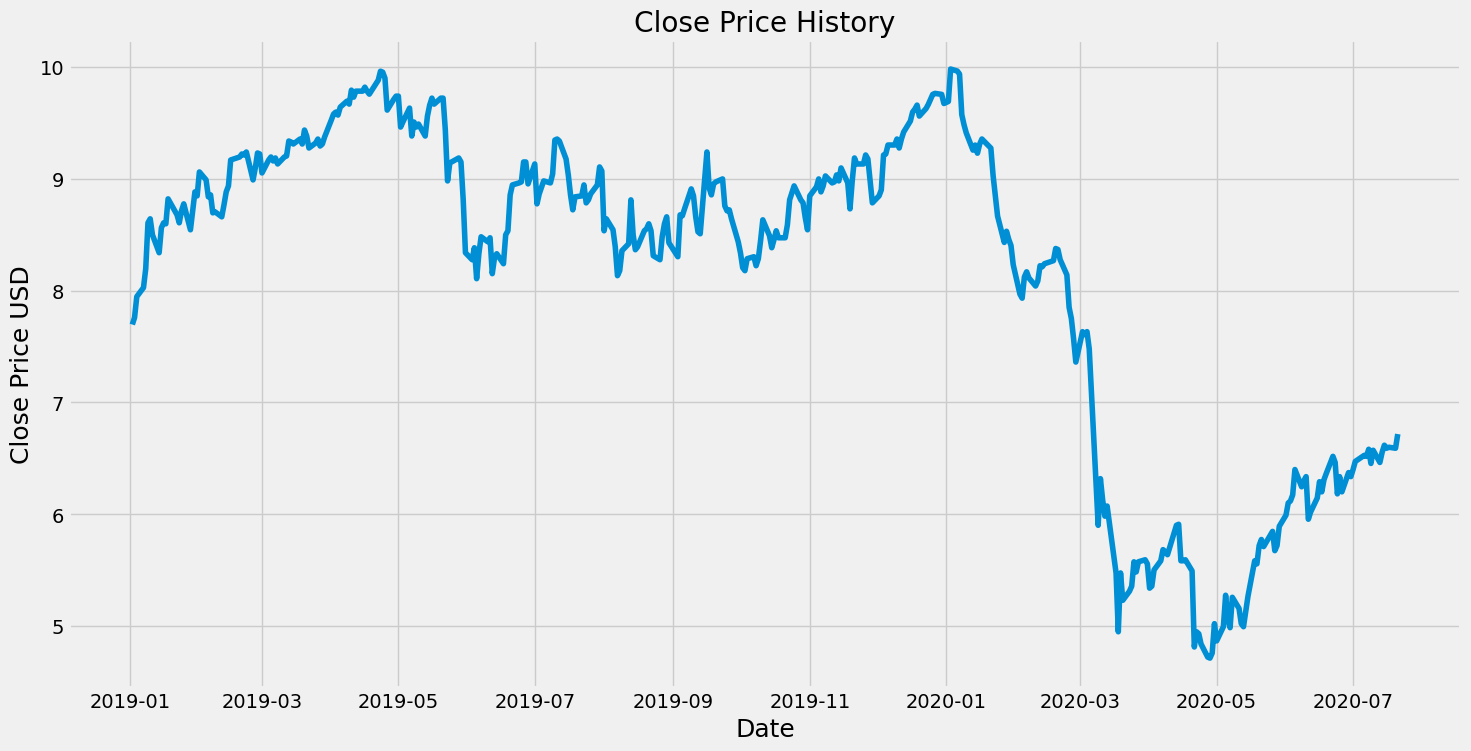

In [17]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [19]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the LST model on 
training_data_len = math.ceil( len(dataset) * 0.8 )
training_data_len

313

In [21]:
# Fix: select the 'Close' column only for scaling
data = df[['Close']]
dataset = data.values
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.56625185],
       [0.5781044 ],
       [0.6136623 ],
       [0.62890165],
       [0.66107285],
       [0.73896154],
       [0.7457346 ],
       [0.71864289],
       [0.68816474],
       [0.73049562],
       [0.73896154],
       [0.7372685 ],
       [0.77959938],
       [0.75250767],
       [0.73896154],
       [0.75928055],
       [0.77113328],
       [0.72710918],
       [0.75928055],
       [0.79145192],
       [0.78467886],
       [0.8253167 ],
       [0.81177093],
       [0.782986  ],
       [0.78637226],
       [0.75589411],
       [0.75758715],
       [0.74912105],
       [0.76943987],
       [0.79145192],
       [0.80161161],
       [0.84563535],
       [0.85071519],
       [0.85579467],
       [0.85410145],
       [0.85918129],
       [0.81177093],
       [0.8320894 ],
       [0.85748807],
       [0.85579467],
       [0.82362348],
       [0.84563535],
       [0.85071519],
       [0.84394213],
       [0.84902215],
       [0.83886247],
       [0.85071519],
       [0.852

In [23]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.56625185, 0.5781044 , 0.6136623 , 0.62890165, 0.66107285,
       0.73896154, 0.7457346 , 0.71864289, 0.68816474, 0.73049562,
       0.73896154, 0.7372685 , 0.77959938, 0.75250767, 0.73896154,
       0.75928055, 0.77113328, 0.72710918, 0.75928055, 0.79145192,
       0.78467886, 0.8253167 , 0.81177093, 0.782986  , 0.78637226,
       0.75589411, 0.75758715, 0.74912105, 0.76943987, 0.79145192,
       0.80161161, 0.84563535, 0.85071519, 0.85579467, 0.85410145,
       0.85918129, 0.81177093, 0.8320894 , 0.85748807, 0.85579467,
       0.82362348, 0.84563535, 0.85071519, 0.84394213, 0.84902215,
       0.83886247, 0.85071519, 0.85240841, 0.8778069 , 0.8761135 ,
       0.87272706, 0.88119316, 0.87272706, 0.89643233, 0.88627301,
       0.86595418, 0.87442028, 0.88119316, 0.86934062, 0.87272706])]
[0.8845797862116501]

[array([0.56625185, 0.5781044 , 0.6136623 , 0.62890165, 0.66107285,
       0.73896154, 0.7457346 , 0.71864289, 0.68816474, 0.73049562,
       0.73896154, 0.7372685 , 0.779

In [25]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
# Reshape the data for LSTM for a 3D shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(253, 60, 1)

In [29]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0805


In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [37]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [39]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [41]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [43]:
# Get the root mean squre error (RMSE) - to test the performance of the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.2461526699555226

In [45]:
train = data.iloc[:training_data_len].copy()
valid = data.iloc[training_data_len:].copy()

In [47]:
# Show the valid and predicted prices
valid

Price,Close
Ticker,DBO
Date,
2020-03-31,5.556853
2020-04-01,5.339293
2020-04-02,5.357422
2020-04-03,5.502463
2020-04-06,5.584048
...,...
2020-07-15,6.617460
2020-07-16,6.590264


In [49]:
# Get the quote
dbo_quote = yf.download('DBO', start='2019-01-01', end='2020-07-22')
new_df = dbo_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed


ValueError: Found array with 0 feature(s) (shape=(60, 0)) while a minimum of 1 is required by MinMaxScaler.

In [51]:
# Get the quote
dbo_quote2 = yf.download('DBO', start='2020-07-22', end='2020-07-22')
print(dbo_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DBO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-22 -> 2020-07-22)')


Empty DataFrame
Columns: [DBO]
Index: []


In [53]:
((7.3089347 - 7.43) / 7.3089347)*100

-1.6564014452065048